In [237]:
import pandas as pd
import numpy as np
from sklearn import cluster,preprocessing,metrics 
import matplotlib.pyplot as plt

In [238]:
df = pd.read_csv('./Mall_Customers.csv')

In [239]:
df.sample(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
147,148,Female,32,77,74
135,136,Female,29,73,88
166,167,Male,42,86,20
34,35,Female,49,33,14
33,34,Male,18,33,92


In [240]:
scaler = preprocessing.StandardScaler()
data_transformed = scaler.fit_transform(df.iloc[:,3:5].values)

In [241]:
model = cluster.DBSCAN(eps=0.25,min_samples=3)
model.fit(data_transformed)

DBSCAN(eps=0.25, min_samples=3)

In [242]:
labels = model.labels_
print(np.unique(labels))

[-1  0  1  2  3  4  5  6  7  8  9 10 11]


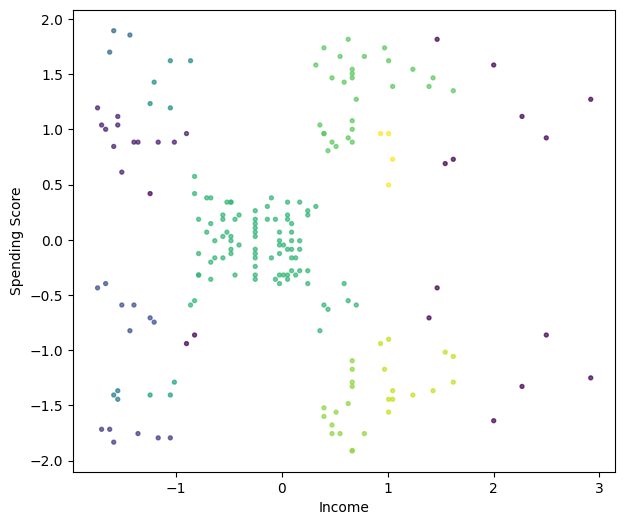

In [248]:
plt.figure(figsize=(7,6))
plt.xlabel('Income')
plt.ylabel('Spending Score')
plt.scatter(x=data_transformed[:,0],y=data_transformed[:,1],c=model.labels_,s=8,)
plt.show()

In [244]:
print(metrics.silhouette_score(data_transformed,labels))

0.3354531046486774
